##### Copyright 2020 The TensorFlow IO Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Color Space Conversions

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/io/tutorials/colorspace"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/io/blob/master/docs/tutorials/colorspace.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/io/blob/master/docs/tutorials/colorspace.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
      <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/io/docs/tutorials/colorspace.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Overview

In computer vision, the selected color space could have a significant the performance of the model. While `RGB` is the most common color space, in manay situations the model performs better when switching to alternative color spaces such as `YUV`, `YCbCr`, `XYZ (CIE)`, etc. 

The `tensorflow-io` package provides a list of color space conversions APIs that can be used to prepare and augment the image data.

## Setup

### Install required Packages, and restart runtime

In [2]:
!pip install -q tensorflow-io

### Download the sample image

The image example used in this tutorial is a [cat in the snow](https://commons.wikimedia.org/wiki/File:Felis_catus-cat_on_snow.jpg), though it could be replaced by any JPEG images.

The following will download the image and save to local disk as `sample.jpg`:

In [3]:
!curl -o sample.jpg -L https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg

!ls -ls sample.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100 17858  100 17858    0     0   235k      0 --:--:-- --:--:-- --:--:--  235k


20 -rw-rw-r-- 1 kbuilder kokoro 17858 Oct 27 16:33 sample.jpg


## Usage

### Read Image File

Read and decode the image into a `uint8` Tensor of shape `(213, 320, 3)`

In [4]:
import tensorflow as tf
import tensorflow_io as tfio

image = tf.image.decode_jpeg(tf.io.read_file('sample.jpg'))

print(image.shape, image.dtype)

(213, 320, 3) <dtype: 'uint8'>


The image can be displayed by:

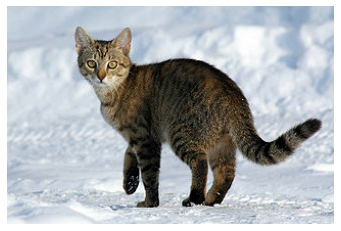

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

### Convert RGB to Grayscale

An `RGB` image can be converted to `Grayscale` to reduce the channel from 3 to 1 with `tfio.experimental.color.rgb_to_grayscale`:

(213, 320, 1) <dtype: 'uint8'>


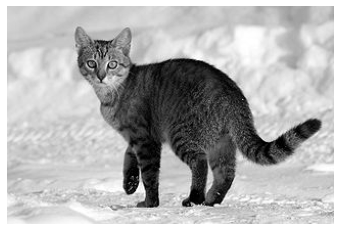

In [6]:
grayscale = tfio.experimental.color.rgb_to_grayscale(image)

print(grayscale.shape, grayscale.dtype)

# use tf.squeeze to remove last channel for plt.imshow to display:
plt.figure()
plt.imshow(tf.squeeze(grayscale, axis=-1), cmap='gray')
plt.axis('off')
plt.show()

### Convert RGB to BGR

Some image software and camera manufacturors might prefer `BGR`, which can be obtained through `tfio.experimental.color.rgb_to_bgr`:

(213, 320, 3) <dtype: 'uint8'>


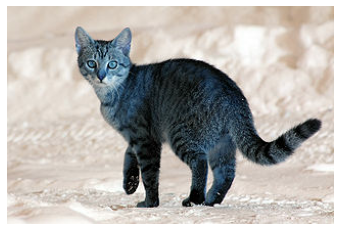

In [7]:
bgr = tfio.experimental.color.rgb_to_bgr(image)

print(bgr.shape, bgr.dtype)

plt.figure()
plt.imshow(bgr)
plt.axis('off')
plt.show()

### Convert RGB to CIE XYZ

`CIE XYZ` (or `CIE 1931 XYZ` is a common color space used in many image processing programs. The following is the conversion from RGB to `CIE XYZ` through `tfio.experimental.color.rgb_to_xyz`. Note `tfio.experimental.color.rgb_to_xyz` assumes floating point input in the range of `[0, 1]` so additional pre-processing is needed:

(213, 320, 3) <dtype: 'uint8'>


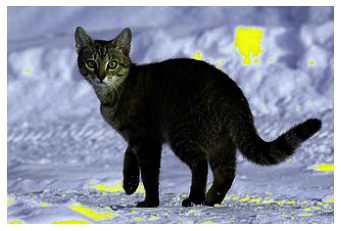

In [8]:
# convert to float32
image_float32 = tf.cast(image, tf.float32) / 255.0

xyz_float32 = tfio.experimental.color.rgb_to_xyz(image_float32)

# convert back uint8
xyz = tf.cast(xyz_float32 * 255.0, tf.uint8)

print(xyz.shape, xyz.dtype)

plt.figure()
plt.imshow(xyz)
plt.axis('off')
plt.show()

### Convert RGB to YCbCr

Finally, `YCbCr` is the default color space in many video systems. Converting to `YCbCr` could be done through `tfio.experimental.color.rgb_to_ycbcr`:

(213, 320, 3) <dtype: 'uint8'>


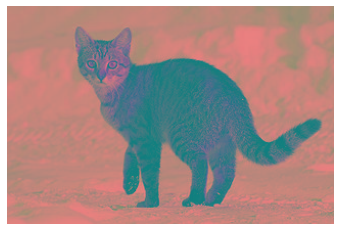

In [9]:
ycbcr = tfio.experimental.color.rgb_to_ycbcr(image)

print(ycbcr.shape, ycbcr.dtype)

plt.figure()
plt.imshow(ycbcr, cmap='gray')
plt.axis('off')
plt.show()

What is more interesting, though, is that `YCbCr` could be decomposed into `Y'` (luma), `Cb` (blue-difference chroma), and `Cr` (red-difference chroma) components with each component carry perceptually meaningful information:

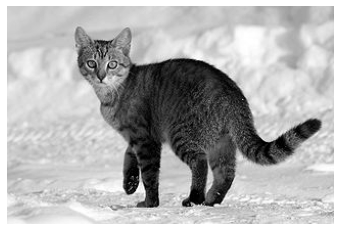

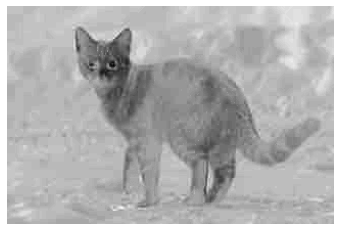

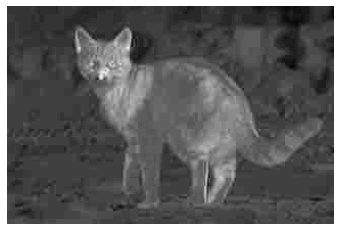

In [10]:
y, cb, cr = ycbcr[:,:,0], ycbcr[:,:,1], ycbcr[:,:,2]

# Y' component
plt.figure()
plt.imshow(y, cmap='gray')
plt.axis('off')
plt.show()

# Cb component
plt.figure()
plt.imshow(cb, cmap='gray')
plt.axis('off')
plt.show()

# Cr component
plt.figure()
plt.imshow(cr, cmap='gray')
plt.axis('off')
plt.show()